<a href="https://colab.research.google.com/github/TalesMiguel/RNA/blob/main/RNA_trabalho2_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Artificiais - Trabalho 02: Modelo Não-Supervisionado**

### **Feito por:**
Camilo Maia Pires - 140473

Tales Miguel Machado Pereira - 140247

# **1. Introdução**


##**1.1. Self-Organizing Maps (SOM)**

As Redes SOM são modelos neurais não supervisionados que projetam dados de alta dimensão em um espaço bidimensional preservando relações topológicas, gerando uma representação discreta dos dados de entrada. Utilizam aprendizado competitivo onde neurônios "vencedores" ativam vizinhos através de funções de vizinhança, permitindo identificação de clusters e padrões intrínsecos.

A rede SOM busca adaptar interativamente uma matriz de duas dimensões de vetores (ou neurônios/nós) a uma topologia de maior dimensão de um dataset em questão. Em seu aprendizado competitivo, os neurônios competem entre si para determinar quem será ativado (*winner*) dado uma entrada. Os neurônios estão ligados num mapa topográfico, o que significa que a informação gerada por um input é representada por neurônios vizinhos dada uma região. Por conta disso, um neurônio vencedor também impacta seus vizinhos, podendo inclusive reduzir a atividade dos neurônios em seu entorno através de inibições laterais, que geram feedback negativo.


##**1.2. Objetivo**

Neste trabalho aplicamos uma rede neural não supervisionada, especificamente o modelo Self-Organizing Map (SOM), para análise de padrões em dois datasets: [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) e [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). O objetivo foi identificar clusters, avaliar a homogeneidade dos agrupamentos e analisar o impacto de diferentes parâmetros no desempenho do modelo. A rede SOM foi escolhida por sua capacidade de reduzir a dimensionalidade dos dados enquanto preserva a topologia original, permitindo uma visualização intuitiva dos padrões subjacentes. Não entraremos em detalhes teóricos de seu funcionamento, mas uma breve explicação será fornecida para contexto inicial.

<br>

---



##**2. Metodologia**
<br>

###**2.1. Datasets Utilizados**


*   [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer): Contém 569 amostras com 30 atributos de características celulares, classificadas em maligno/benigno.
*   [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html): Contém 178 amostras de vinhos com 13 atributos físico-químicos, divididos em 3 classes.



<br>

###**2.2. Pré-processamento**
* Normalização: Os dados foram normalizados para o intervalo [0, 1] usando MinMaxScaler.


<br>


###**2.3. Treinamento da Rede SOM**
* Parâmetros Iniciais:

    * Tamanho do mapa: 10x7 neurônios.

    * Sigma (raio de vizinhança): 5.

    * Taxa de aprendizado (eta): 0.1.

    * Número de épocas: 500.

    * Função de vizinhança: Gaussiana.

    * Topologia: Hexagonal.

* Métricas de Avaliação:

    * Erro de quantização: Mede a distância média entre as amostras e os neurônios vencedores.

    * Erro topográfico: Avalia a preservação da topologia dos dados.

<br>


###**2.4. Variação de Parâmetros**
Para avaliar o impacto dos parâmetros, foram testadas configurações com:

* Tamanho do mapa aumentado (15x10 neurônios).

* Sigma reduzido (2).

* Número de épocas aumentado (1000).

<br>

###**2.5 Avaliação:**

* **U-Matrix:** Para visualização de clusters (áreas mais escuras indicam maiores distâncias entre neurônios, sugerindo fronteiras entre clusters.).

* **Hits Map:** Para análise de densidade de amostras. Identificação de neurônios com muitos hits (clusters densos) e poucos hits (possíveis outliers).

* **Coeficiente de Silhueta:** O quão “semelhante” o elemento em questão é similar aos outros do seu cluster. Vai de -1 (mau agrupamento, o ponto está mais próximo de outro cluster) a 1 (agrupamento perfeito, o ponto está no centro do cluster). Quanto maior, melhor.


* **Índice de Davies-Bouldin:** O quão “bem separados” foram os clusters. Retorna a similaridade padrão entre os grupos, cujo resultado pode variar de 0 (extremamente similares) até o infinito positivo (não similares). Quanto menor, melhor.

* **Tempo de treinamento:** Comparação de tempo entre diferentes parâmetros.

* **Erros:**
    * **Quantização:** Mede a distância média entre as amostras e os neurônios vencedores. Um erro de quantização baixo indica que os neurônios estão bem ajustados aos dados, ou seja, estão próximos das amostras. Quanto menor, melhor, mas é preciso ter cuidado com overfitting.

    * **Topográfico:** Mede a preservação da topologia. Ele verifica se os neurônios vencedores (BMUs - Best Matching Units) de amostras vizinhas no espaço de entrada também são vizinhos no mapa SOM. Um erro topológico baixo indica que a topologia dos dados foi bem preservada, enquanto um erro alto sugere que a estrutura dos dados foi distorcida. Quanto menor, melhor.



<br>


---



## **3. Implementação**

### **3.1. Instalação e Importação de Bibliotecas**

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=380265b47bad9a0bbfd037cce0a9137168af46fa4f5c22517820bb7e11eeddfd
  Stored in directory: /root/.cache/pip/wheels/c8/29/ba/ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


In [22]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import time



---



##**3.2. Pré-processamento dos dados e definindo Treinamento da SOM**
<br>

**Dataset 01:** [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

**Dataset 02:** [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

<br>


In [23]:
dataset_1 = sklearn.datasets.load_breast_cancer()
dataset_2 = sklearn.datasets.load_wine()

# Converte datasets para dataframes
df_1 = pd.DataFrame(dataset_1.data, columns=dataset_1.feature_names)
df_2 = pd.DataFrame(dataset_2.data, columns=dataset_2.feature_names)

# Adicionando rótulos
df_1['label'] = [dataset_1.target_names[i] for i in dataset_1.target]
df_2['label'] = [dataset_2.target_names[i] for i in dataset_2.target]


#### **3.3.Normalização dos dados**


Antes de aplicar a rede SOM, os dados foram normalizados para garantir que todos os atributos estivessem na mesma escala. Isso é essencial para algoritmos baseados em distâncias, como o SOM, pois atributos com escalas maiores podem dominar o cálculo das distâncias, prejudicando o desempenho do modelo. Utilizamos a normalização Min-Max, que transforma os dados para o intervalo [0, 1], preservando a distribuição original.

In [24]:
x_cancer = df_1.drop(['label'], axis=1)
x_wine = df_2.drop(['label'], axis=1)

# Normalização dos dados
scaler = MinMaxScaler()
x_cancer = scaler.fit_transform(x_cancer)
x_wine = scaler.fit_transform(x_wine)

# troca rótulos únicos por números
## Breast Cancer
labels_1 = df_1.label.unique()
df_1['label'] = df_1['label'].replace(labels_1, range(len(labels_1)))
target = df_1['label'].values

## Wine
labels_2 = df_2.label.unique()
df_2['label'] = df_2['label'].replace(labels_2, range(len(labels_2)))
target = df_2['label'].values

print("Breast Cancer:\n")
print(df_1.tail())
print("\nWine: \n")
print(df_2.tail())

Breast Cancer:

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  wor

<ipython-input-24-986873f1010f>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1['label'] = df_1['label'].replace(labels_1, range(len(labels_1)))
<ipython-input-24-986873f1010f>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2['label'] = df_2['label'].replace(labels_2, range(len(labels_2)))


### **Função de treino utilizando MiniSom**

In [30]:
# seed fixa para reprodutibilidade
seed = 42

def train_som(ds_name, turn, x_data, nl, nc, sigma, eta, epocas, neighbourhood_function, topology, seed):
    som = MiniSom(nl, nc, x_cancer.shape[1], sigma=sigma, learning_rate=eta,
             neighborhood_function="gaussian",
             random_seed=seed, topology="hexagonal")

    # Medição do tempo de treinamento
    start_time = time.time()
    som.random_weights_init(x_data)
    som.train_random(x_data, epocas)
    training_time = time.time() - start_time

    # Obter os labels dos clusters
    cluster_labels = [som.winner(x) for x in x_data]
    cluster_labels_indices = [np.ravel_multi_index(label, (nl, nc)) for label in cluster_labels]

    # Métricas
    silhouette_avg = silhouette_score(x_data, cluster_labels_indices)
    db_index = davies_bouldin_score(x_data, cluster_labels_indices)
    q_error = som.quantization_error(x_data)
    t_error = som.topographic_error(x_data)

    return {
        "ds_name": ds_name,
        "turn": turn,
        "som": som,
        "silhouette": silhouette_avg,
        "db_index": db_index,
        "q_error": q_error,
        "t_error": t_error,
        "training_time": training_time
    }

---

<br>

## **Treinamento da rede SOM para todos Datasets**

In [39]:
'''
nl: número de neurônios linha
nc: número de neurônios coluna
sigma: raio de vizinhança
eta: taxa de aprendizado
epocas: número de épocas
'''
# Hiperparâmetros definidos previamente
params_set = [
    {"ds_name": "breast_cancer", "turn": 1, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 500},
    {"ds_name": "breast_cancer", "turn": 2, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 1000},
    {"ds_name": "breast_cancer", "turn": 3, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.1, "epocas": 5000},
    {"ds_name": "breast_cancer", "turn": 4, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.1, "epocas": 10000},

    # {"ds_name": "wine", "turn": 1, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 500},
    # {"ds_name": "wine", "turn": 2, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 1000},
    # {"ds_name": "wine", "turn": 3, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.1, "epocas": 5000},
    # {"ds_name": "wine", "turn": 4, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.1, "epocas": 10000},
]


# Executar treinamentos
results = []
for params in params_set:
    # Seleciona DS correto
    x_data = x_cancer if params["ds_name"] == "breast_cancer" else x_wine

    # Chaves duplicadas
    params_filtered = params.copy()
    ds_name = params_filtered.pop("ds_name")
    turn = params_filtered.pop("turn")

    res = train_som(ds_name, turn, x_data, **params_filtered,
                    neighbourhood_function='gaussian', topology='hexagonal', seed=seed)
    results.append(res)


# Exibir resultados
for i, res in enumerate(results):
    print(f"\nResultados do treinamento do dataset {res['ds_name']} na {res['turn']} iteração:")
    print(f"Coeficiente de Silhueta: {res['silhouette']:.4f}")
    print(f"Índice de Davies-Bouldin: {res['db_index']:.4f}")
    print(f"Erro de quantização: {res['q_error']:.4f}")
    print(f"Erro topográfico: {res['t_error']:.4f}")
    print(f"Tempo de treinamento: {res['training_time']:.2f} segundos")



Resultados do treinamento do dataset breast_cancer na 1 iteração:
Coeficiente de Silhueta: -0.0249
Índice de Davies-Bouldin: 3.4431
Erro de quantização: 0.5419
Erro topográfico: 0.0000
Tempo de treinamento: 0.02 segundos

Resultados do treinamento do dataset breast_cancer na 2 iteração:
Coeficiente de Silhueta: 0.0053
Índice de Davies-Bouldin: 3.2290
Erro de quantização: 0.5325
Erro topográfico: 0.0000
Tempo de treinamento: 0.07 segundos

Resultados do treinamento do dataset breast_cancer na 3 iteração:
Coeficiente de Silhueta: -0.1131
Índice de Davies-Bouldin: 1.2032
Erro de quantização: 0.3279
Erro topográfico: 0.0123
Tempo de treinamento: 1.71 segundos

Resultados do treinamento do dataset breast_cancer na 4 iteração:
Coeficiente de Silhueta: -0.1041
Índice de Davies-Bouldin: 1.1202
Erro de quantização: 0.3227
Erro topográfico: 0.0070
Tempo de treinamento: 2.46 segundos


---

<br>

##### **Visualização dos Resultados**

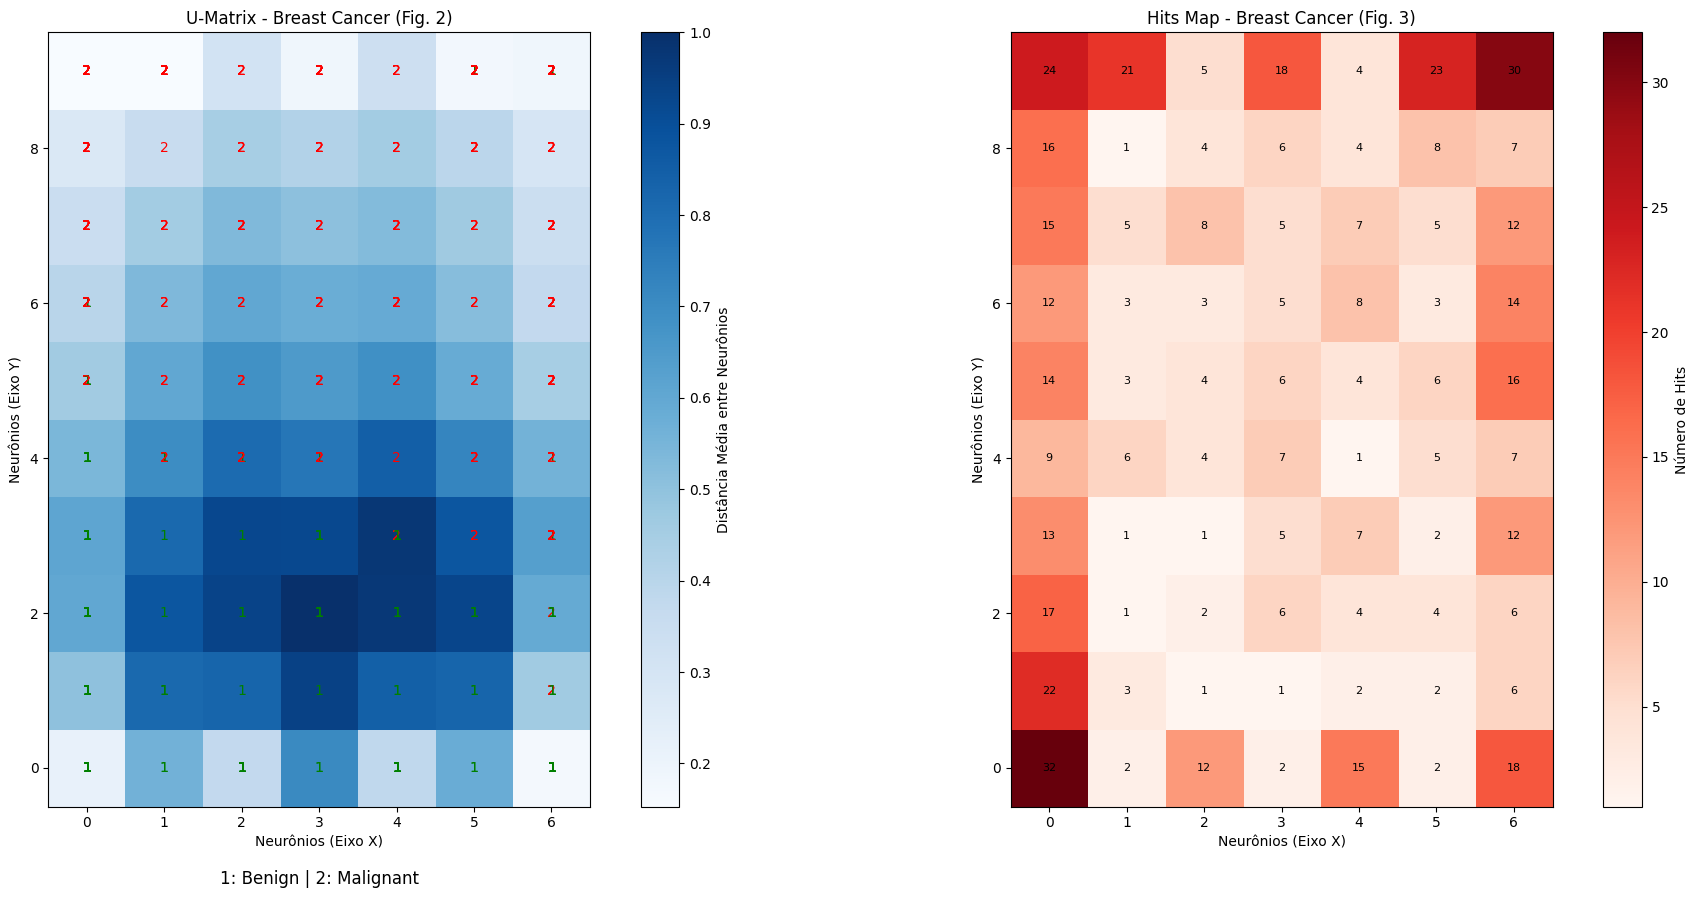

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# U-Matrix
u_matrix = som_cancer.distance_map()
im2 = ax1.imshow(u_matrix, cmap='Blues', origin='lower')  # Origem em 0,0 para facilitar visualização
ax1.set_title("U-Matrix - Breast Cancer (Fig. 2)")
ax1.set_xlabel("Neurônios (Eixo X)")
ax1.set_ylabel("Neurônios (Eixo Y)")
fig.colorbar(im2, ax=ax1, label='Distância Média entre Neurônios')

# Números com cores diferentes
for idx, xx in enumerate(x_cancer):
    w = som_cancer.winner(xx)
    color = 'green' if target[idx] == 0 else 'red'  # Verde == benign, vermelho == malignant
    ax1.text(w[1], w[0], target[idx] + 1, color=color, fontsize=10, ha='center', va='center')

ax1.text(0.5, -0.1, "1: Benign | 2: Malignant", transform=ax1.transAxes, fontsize=12, ha='center')


# Hits Map
hits = som_cancer.activation_response(x_cancer).astype(int)
im3 = ax2.imshow(hits, cmap='Reds', origin='lower')  # Origem em 0,0 para facilitar visualização
ax2.set_title("Hits Map - Breast Cancer (Fig. 3)")
ax2.set_xlabel("Neurônios (Eixo X)")
ax2.set_ylabel("Neurônios (Eixo Y)")
fig.colorbar(im3, ax=ax2, label='Número de Hits')

# Hits em cada neurônio
for (i, j), value in np.ndenumerate(hits):
    ax2.text(j, i, value, ha='center', va='center', color='black', fontsize=8)


plt.tight_layout()
plt.show()

###### **Interpretação da U-Matrix:**

A U-Matrix (Unified Distance Matrix) é uma visualização utilizada aqui para  análise de clusters no mapa SOM. Na figura 2, tanto a cor verde quanto o número 1 representam classes benignas, e a cor vermelha e o número 2 representam classes malignas.

**Áreas escuras:** Indicam que os neurônios naquela região estão mais distantes uns dos outros. Eles possivelmente representam uma fronteira entre clusters, como em (2,0).

**Áreas claras:** Indicam que os neurônios naquela região estão mais próximos uns dos outros. Essas áreas representam clusters, como em (0,8).

No geral, temos dois clusters principais separando classes malignas (regiões claras) das benignas (regiões escuras).

###### **Interpretação do Hits Map:**


O Hits Map é uma visualização que permite observarmos quantas amostras foram mapeadas para cada neurônio.

**Áreas escuras:** Nos pontos mais escuros temos **clusters densos** representados por neurônios com muitos hits, como em (0,0).

**Áreas claras:** Nos pontos mais claros temos regiões de transição entre clusters, como em (3,2), ou possíveis outliers, como em (2,1).


##### **Alterando os parâmetros**

In [20]:
nl, nc = 30, 20   # Aumentar o número de neurônios (600)
sigma = 2         # Raio de vizinhança menor
eta = 0.1         # Taxa de aprendizado igual
epocas = 100000     # Aumentar o número de épocas

som_cancer_2 = MiniSom(nl, nc, x_cancer.shape[1], sigma=sigma, learning_rate=eta,
             neighborhood_function=neighbourhood_function,
             random_seed=seed, topology=topology)


# Obter os labels dos clusters
cluster_labels_cancer = [som_cancer_2.winner(x) for x in x_cancer]
cluster_labels_cancer_indices = [
        np.ravel_multi_index(label, (nl, nc)) for label in cluster_labels_cancer
    ]

# Coeficiente de silhueta
silhouette_avg_cancer = silhouette_score(x_cancer, cluster_labels_cancer_indices)
print(f"Coeficiente de Silhueta: {silhouette_avg_cancer:.4f}")

# Índice de Davies-Bouldin
db_index_cancer = davies_bouldin_score(x_cancer, cluster_labels_cancer_indices)
print(f"Índice de Davies-Bouldin: {db_index_cancer:.4f}")


# Medição do tempo de treinamento
start_time = time.time()
som_cancer_2.random_weights_init(x_cancer) # Pesos aleatórios
som_cancer_2.train_random(x_cancer, epocas)
end_time = time.time()

training_time = end_time - start_time
print(f"Tempo de treinamento (parâmetros alterados): {training_time:.2f} segundos")

# Erro de quantização
q_error = som_cancer_2.quantization_error(x_cancer)
print("Erro de quantização:", q_error)

# Erro topográfico
t_error = som_cancer_2.topographic_error(x_cancer)
print("Erro topográfico:", t_error)


Coeficiente de Silhueta: -0.1018
Índice de Davies-Bouldin: 1.7236
Tempo de treinamento (parâmetros alterados): 21.00 segundos
Erro de quantização: 0.20393683998481027
Erro topográfico: 0.01405975395430581


#### Mapa de Distribuição das Classes

Aqui temos uma distribuição U-Matrix para visualização da distância entre os neurônios.

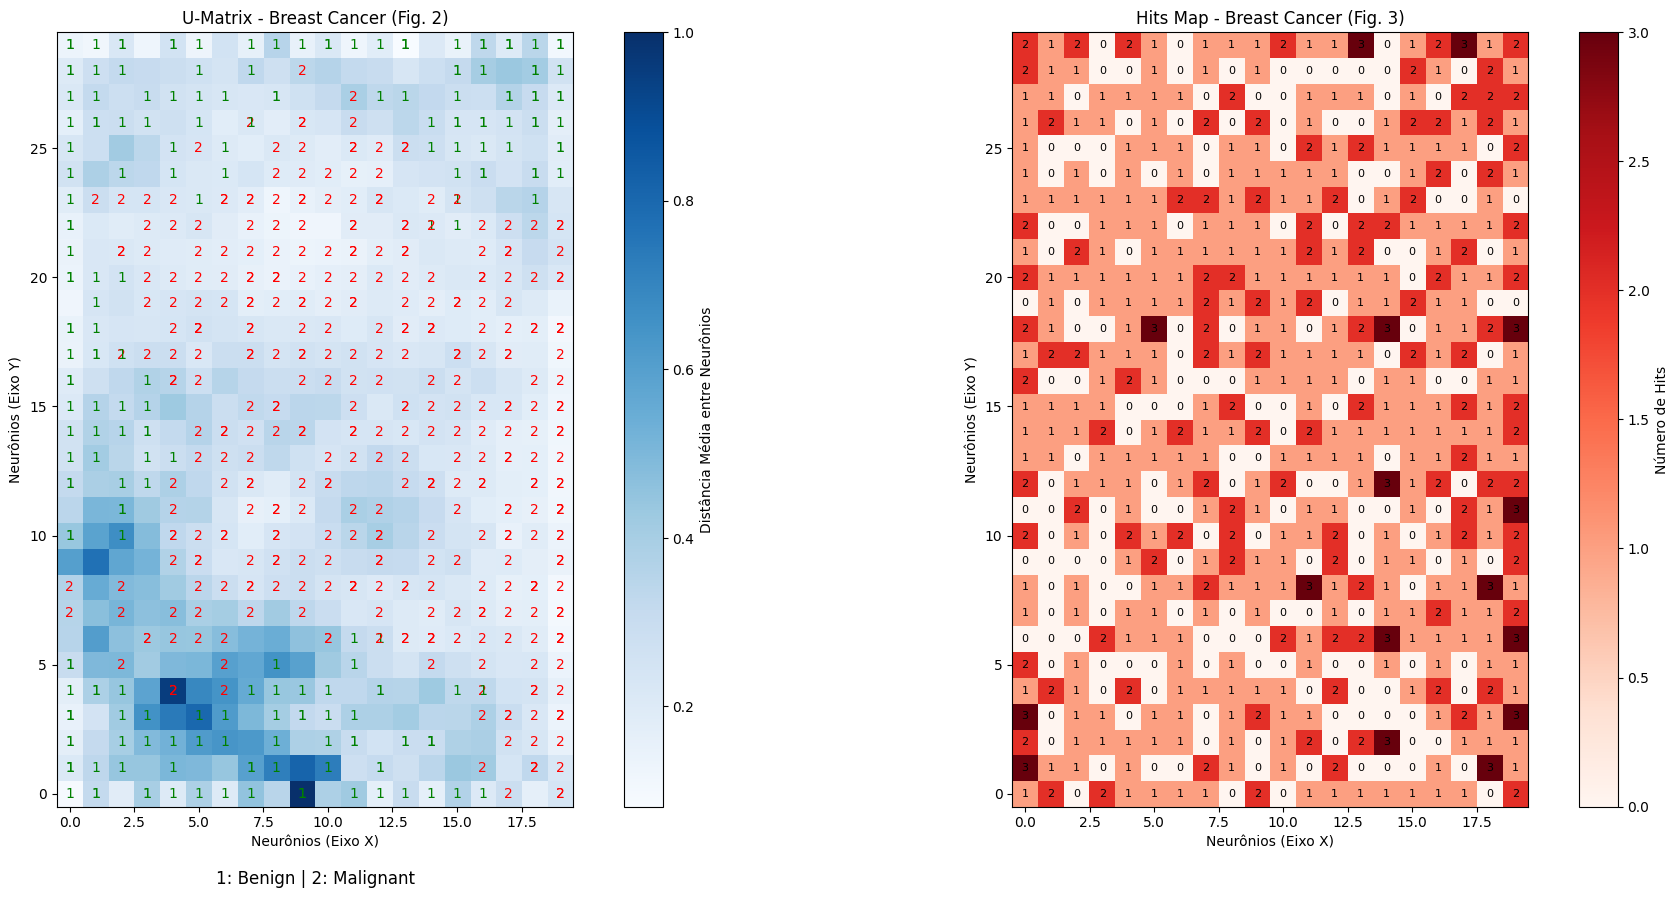

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

# U-Matrix
u_matrix = som_cancer_2.distance_map()
im2 = ax1.imshow(u_matrix, cmap='Blues', origin='lower')  # Origem em 0,0 para facilitar visualização
ax1.set_title("U-Matrix - Breast Cancer (Fig. 4)")
ax1.set_xlabel("Neurônios (Eixo X)")
ax1.set_ylabel("Neurônios (Eixo Y)")
fig.colorbar(im2, ax=ax1, label='Distância Média entre Neurônios')

# Números com cores diferentes
for idx, xx in enumerate(x_cancer):
    w = som_cancer_2.winner(xx)
    color = 'green' if target[idx] == 0 else 'red'  # Verde == benign, vermelho == malignant
    ax1.text(w[1], w[0], target[idx] + 1, color=color, fontsize=10, ha='center', va='center')

ax1.text(0.5, -0.1, "1: Benign | 2: Malignant", transform=ax1.transAxes, fontsize=12, ha='center')


# Hits Map
hits = som_cancer_2.activation_response(x_cancer).astype(int)
im3 = ax2.imshow(hits, cmap='Reds', origin='lower')  # Origem em 0,0 para facilitar visualização
ax2.set_title("Hits Map - Breast Cancer (Fig. 5)")
ax2.set_xlabel("Neurônios (Eixo X)")
ax2.set_ylabel("Neurônios (Eixo Y)")
fig.colorbar(im3, ax=ax2, label='Número de Hits')

# Hits em cada neurônio
for (i, j), value in np.ndenumerate(hits):
    ax2.text(j, i, value, ha='center', va='center', color='black', fontsize=8)


plt.tight_layout()
plt.show()

##**4. Análise e Resultados**
<br>

### **Breast Cancer Wisconsin**

<br>

#### Análise do Heatmap de Correlação

O heatmap de correlação (Figura 1) foi utilizado para analisar as relações entre os atributos do Dataset. Observamos que muitos atributos, como `mean radius`, `mean perimeter` e `mean area`, apresentam correlações positivas próximas de 1, indicando que estão fortemente relacionados. Por outro lado, atributos como `mean fractal dimension` e `mean smoothness` mostram correlações mais baixas, sugerindo que representam características distintas das células. Essas informações são valiosas para o contexto de estudos aplicados ao dataset, mas para este trabalho servem apenas como visualização do conjunto de dados.

<br>

#### Análise da U-Matrix
A U-Matrix gerada para o Breast Cancer Wisconsin (Figura 2) revelou a formação de dois clusters principais, correspondentes às classes "malignant" e "benign". Áreas mais escuras na U-Matrix indicam fronteiras bem definidas entre os clusters, enquanto áreas mais claras sugerem regiões de transição.

<br>

#### Análise do Hits Map
O Hits Map (Figura Y) mostrou que a maioria das amostras está concentrada em poucos neurônios, indicando alta densidade nesses clusters.

<br>


#### Variação de parâmetros, erro e tempo

Inicialmente o erro de quantização foi de 0.435, relativamente alto, o que indica que o modelo pode não estar ajustado corretamente ao nosso dataset. Isso pode ser corrigido aumentando o número de neurônios, de épocas ou alterando sigma/eta. O erro topográfico foi de 0.066, sugerindo uma boa preservação da topologia dos dados. O tempo de treinamento foi de cerca de 0.04 segundos, o que é bem baixo.

Ao variar os parâmetros do modelo, observamos que o aumento do número de neurônios e do número de épocas resultou em uma redução do erro de quantização, que caiu para 0.203. O erro topográfico caiu também para 0.014. Com mais neurônios o mapa poderia ter se tornado mais esparso, mas o aumento significativo de épocas de treinamento permitiu que o modelo se ajustasse de uma forma mais eficiente, reduzindo também o erro topológico. O tempo de treinamento aumentou significativamente para cerca de 24 segundos devido ao aumento do número de neurônios e principalmente ao aumento massivo do número de épocas. A maior acurácia do modelo claramente reflete no aumento do tempo de treinamento do modelo.


<br>

---

<br>

### **Wine Dataset**

**U-Matrix:** Descrição e interpretação.

**Hits Map:** Análise dos clusters e outliers.

**Erros:** Discussão sobre o erro de quantização e o erro topográfico.

**Variação de Parâmetros:** Resultados e discussão.





---




##**5. Discussão**

<br>

Os resultados obtidos com a rede SOM mostraram-se promissores para a identificação de padrões em ambos os datasets. No Breast Cancer Wisconsin, a rede foi capaz de separar claramente as classes "malignant" e "benign", com clusters bem definidos na U-Matrix. Já no Wine Dataset, os três tipos de vinho foram agrupados de forma distinta, embora com alguma sobreposição em regiões de transição.

A variação dos parâmetros demonstrou que a escolha do tamanho do mapa e da taxa de aprendizado tem um impacto significativo na qualidade dos clusters.

É importante salientar que o resultado do tempo de treinamento pode variar bastante em decorrência dos dados aleatórios de treino escolhidos a cada iteração. A medida simples de tempo utilizada aqui poderia ser mais precisa utilizando os mesmos dados de treino entre as duas "rodadas" de treinamento (pré e pós alteração de parâmetros), ou ainda fazendo uma média de tempo entre várias iterações de treino. No entanto, para contexto de visualização simples de conceitos vistos em aula que gostaríamos de observar neste trabalho, a abordagem utilizada se mostrou suficiente.

Uma limitação observada foi a dificuldade em identificar outliers, especialmente em datasets com alta dimensionalidade. Futuros trabalhos poderiam explorar técnicas complementares, como PCA (Principal Component Analysis), para reduzir a dimensionalidade antes da aplicação da rede SOM.

##**6. Conclusão**
<br>

Neste trabalho, aplicamos a rede SOM para análise de padrões em dois datasets: Breast Cancer Wisconsin e Wine Dataset. Os resultados demonstraram a eficácia da rede em identificar clusters e preservar a topologia dos dados, com destaque para a clara separação das classes no Breast Cancer Wisconsin.

A variação dos parâmetros mostrou que a escolha adequada do tamanho do mapa, da taxa de aprendizado e do número de épocas é crucial para o desempenho do modelo e para análise mais precisa dos gráficos gerados. Futuros trabalhos poderiam explorar a combinação da rede SOM com outras técnicas de redução de dimensionalidade, como PCA, visando a melhoria na identificação de outliers e na interpretação visual dos resultados.

##**7. Referências**
<br>


*   Sklearn Datasets: https://scikit-learn.org/stable/api/sklearn.datasets.html
*   Documentação MiniSom: https://github.com/JustGlowing/minisom
*   Univesp - Redes Neurais - A rede SOM aplicada ao problema de agrupamento de dados, Professor Marcos Quiles https://www.youtube.com/watch?v=ydrJ_p158dA&t=857s&ab_channel=UNIVESP


